# Duomenų paruošimas

In [27]:
import pandas as pd

Nuskaitome duomenų šaltinį `./dataset/papers.csv`.

In [28]:
df = pd.read_csv('./dataset/papers.csv', low_memory=False)
df = df[['Article Title', 'Abstract', 'Authors', 'Times Cited, All Databases']]
df

,Article Title,Abstract,Authors,"Times Cited, All Databases"
0,Deep Residual Learning for Image Recognition,Deeper neural networks are more difficult to t...,"He, KM; Zhang, XY; Ren, SQ; Sun, J",142551
1,Attention Is All You Need,The dominant sequence transduction models are ...,"Vaswani, A; Shazeer, N; Parmar, N; Uszkoreit, ...",91998
2,Random forests,Random forests are a combination of tree predi...,"Breiman, L",88025
3,U-Net: Convolutional Networks for Biomedical I...,There is large consent that successful trainin...,"Ronneberger, O; Fischer, P; Brox, T",79839
4,Scikit-learn: Machine Learning in Python,Scikit-learn is a Python module integrating a ...,"Pedregosa, F; Varoquaux, G; Gramfort, A; Miche...",71938
...,...,...,...,...
9995,Learning Generative Models with Sinkhorn Diver...,The ability to compare two degenerate probabil...,"Genevay, A; Peyré, G; Cuturi, M",292
9996,Cooperative Learning of Audio and Video Models...,There is a natural correlation between the vis...,"Korbar, B; Tran, D; Torresani, L",302
9997,Learning for Disparity Estimation through Feat...,Stereo matching algorithms usually consist of ...,"Liang, ZF; Feng, YL; Guo, YL; Liu, HZ; Chen, W...",327
9998,Fast and Effective Robustness Certification,"We present a new method and system, called Dee...","Singh, G; Gehr, T; Mirman, M; Püschel, M; Vech...",316


Pašaliname įrašus, turinčius pasikartojančias *Article Title* ir *Abstract* bei neegzistuojančias reikšmes bent viename iš stulpelių.

In [29]:
# Drop duplicate article titles and abstracts
df = df.drop_duplicates(subset=['Article Title'])
df = df.drop_duplicates(subset=['Abstract'])
# Drop rows with missing values
df = df.dropna(subset=['Article Title', 'Abstract', 'Authors', 'Times Cited, All Databases'])
df

,Article Title,Abstract,Authors,"Times Cited, All Databases"
0,Deep Residual Learning for Image Recognition,Deeper neural networks are more difficult to t...,"He, KM; Zhang, XY; Ren, SQ; Sun, J",142551
1,Attention Is All You Need,The dominant sequence transduction models are ...,"Vaswani, A; Shazeer, N; Parmar, N; Uszkoreit, ...",91998
2,Random forests,Random forests are a combination of tree predi...,"Breiman, L",88025
3,U-Net: Convolutional Networks for Biomedical I...,There is large consent that successful trainin...,"Ronneberger, O; Fischer, P; Brox, T",79839
4,Scikit-learn: Machine Learning in Python,Scikit-learn is a Python module integrating a ...,"Pedregosa, F; Varoquaux, G; Gramfort, A; Miche...",71938
...,...,...,...,...
9995,Learning Generative Models with Sinkhorn Diver...,The ability to compare two degenerate probabil...,"Genevay, A; Peyré, G; Cuturi, M",292
9996,Cooperative Learning of Audio and Video Models...,There is a natural correlation between the vis...,"Korbar, B; Tran, D; Torresani, L",302
9997,Learning for Disparity Estimation through Feat...,Stereo matching algorithms usually consist of ...,"Liang, ZF; Feng, YL; Guo, YL; Liu, HZ; Chen, W...",327
9998,Fast and Effective Robustness Certification,"We present a new method and system, called Dee...","Singh, G; Gehr, T; Mirman, M; Püschel, M; Vech...",316


Paruošiame duomenis įterpinių (angl. embeddings) skaičiavimui. Juos skaičiuosime tekstui, sudarytam iš straipsnio pavadinimo (angl. title) ir santraukos (angl. abstract), kur šios dalys atskirtos nauja eilute.

In [30]:
#df['Text For Embedding'] = [f"{row['Article Title']}\n{row['Abstract']}" for idx, row in df.iterrows()]
df['Text For Embedding'] = [f"{row['Abstract']}" for idx, row in df.iterrows()]
df

,Article Title,Abstract,Authors,"Times Cited, All Databases",Text For Embedding
0,Deep Residual Learning for Image Recognition,Deeper neural networks are more difficult to t...,"He, KM; Zhang, XY; Ren, SQ; Sun, J",142551,Deeper neural networks are more difficult to t...
1,Attention Is All You Need,The dominant sequence transduction models are ...,"Vaswani, A; Shazeer, N; Parmar, N; Uszkoreit, ...",91998,The dominant sequence transduction models are ...
2,Random forests,Random forests are a combination of tree predi...,"Breiman, L",88025,Random forests are a combination of tree predi...
3,U-Net: Convolutional Networks for Biomedical I...,There is large consent that successful trainin...,"Ronneberger, O; Fischer, P; Brox, T",79839,There is large consent that successful trainin...
4,Scikit-learn: Machine Learning in Python,Scikit-learn is a Python module integrating a ...,"Pedregosa, F; Varoquaux, G; Gramfort, A; Miche...",71938,Scikit-learn is a Python module integrating a ...
...,...,...,...,...,...
9995,Learning Generative Models with Sinkhorn Diver...,The ability to compare two degenerate probabil...,"Genevay, A; Peyré, G; Cuturi, M",292,The ability to compare two degenerate probabil...
9996,Cooperative Learning of Audio and Video Models...,There is a natural correlation between the vis...,"Korbar, B; Tran, D; Torresani, L",302,There is a natural correlation between the vis...
9997,Learning for Disparity Estimation through Feat...,Stereo matching algorithms usually consist of ...,"Liang, ZF; Feng, YL; Guo, YL; Liu, HZ; Chen, W...",327,Stereo matching algorithms usually consist of ...
9998,Fast and Effective Robustness Certification,"We present a new method and system, called Dee...","Singh, G; Gehr, T; Mirman, M; Püschel, M; Vech...",316,"We present a new method and system, called Dee..."


Sukuriame funkciją, kuri užtikrins, kad tekstas, pavertus jį į žetonus (angl. tokens) nebus ilgesnis nei 512. To reikia, norint išvengti klaidų dėl per ilgo konteksto dydžio.

In [31]:
from tqdm.notebook import tqdm as notebook_tqdm
from transformers import AutoTokenizer
import transformers

transformers.logging.set_verbosity_error()

encoding = AutoTokenizer.from_pretrained("bert-base-uncased")

def safe_truncate(text, max_tokens=510):
    tokens = encoding.encode(text)
    if len(tokens) > max_tokens:
        print(f"⚠️ Text too long ({len(tokens)} tokens). Truncating to {max_tokens}.")
        tokens = tokens[:max_tokens]
        return encoding.decode(tokens)
    return text

In [32]:
df['Text For Embedding'] = [safe_truncate(row['Text For Embedding']) for idx, row in df.iterrows()]
df

⚠️ Text too long (552 tokens). Truncating to 510.
⚠️ Text too long (854 tokens). Truncating to 510.
⚠️ Text too long (668 tokens). Truncating to 510.
⚠️ Text too long (902 tokens). Truncating to 510.
⚠️ Text too long (531 tokens). Truncating to 510.
⚠️ Text too long (513 tokens). Truncating to 510.
⚠️ Text too long (588 tokens). Truncating to 510.
⚠️ Text too long (643 tokens). Truncating to 510.
⚠️ Text too long (517 tokens). Truncating to 510.
⚠️ Text too long (513 tokens). Truncating to 510.
⚠️ Text too long (617 tokens). Truncating to 510.
⚠️ Text too long (568 tokens). Truncating to 510.
⚠️ Text too long (542 tokens). Truncating to 510.
⚠️ Text too long (556 tokens). Truncating to 510.
⚠️ Text too long (524 tokens). Truncating to 510.
⚠️ Text too long (542 tokens). Truncating to 510.
⚠️ Text too long (511 tokens). Truncating to 510.
⚠️ Text too long (537 tokens). Truncating to 510.
⚠️ Text too long (542 tokens). Truncating to 510.
⚠️ Text too long (528 tokens). Truncating to 510.


,Article Title,Abstract,Authors,"Times Cited, All Databases",Text For Embedding
0,Deep Residual Learning for Image Recognition,Deeper neural networks are more difficult to t...,"He, KM; Zhang, XY; Ren, SQ; Sun, J",142551,Deeper neural networks are more difficult to t...
1,Attention Is All You Need,The dominant sequence transduction models are ...,"Vaswani, A; Shazeer, N; Parmar, N; Uszkoreit, ...",91998,The dominant sequence transduction models are ...
2,Random forests,Random forests are a combination of tree predi...,"Breiman, L",88025,Random forests are a combination of tree predi...
3,U-Net: Convolutional Networks for Biomedical I...,There is large consent that successful trainin...,"Ronneberger, O; Fischer, P; Brox, T",79839,There is large consent that successful trainin...
4,Scikit-learn: Machine Learning in Python,Scikit-learn is a Python module integrating a ...,"Pedregosa, F; Varoquaux, G; Gramfort, A; Miche...",71938,Scikit-learn is a Python module integrating a ...
...,...,...,...,...,...
9995,Learning Generative Models with Sinkhorn Diver...,The ability to compare two degenerate probabil...,"Genevay, A; Peyré, G; Cuturi, M",292,The ability to compare two degenerate probabil...
9996,Cooperative Learning of Audio and Video Models...,There is a natural correlation between the vis...,"Korbar, B; Tran, D; Torresani, L",302,There is a natural correlation between the vis...
9997,Learning for Disparity Estimation through Feat...,Stereo matching algorithms usually consist of ...,"Liang, ZF; Feng, YL; Guo, YL; Liu, HZ; Chen, W...",327,Stereo matching algorithms usually consist of ...
9998,Fast and Effective Robustness Certification,"We present a new method and system, called Dee...","Singh, G; Gehr, T; Mirman, M; Püschel, M; Vech...",316,"We present a new method and system, called Dee..."


Skaičiuojame įterpinius.


In [33]:
%env TOKENIZERS_PARALLELISM=false

env: TOKENIZERS_PARALLELISM=false


In [34]:
import ollama

batch_size = 10
embeddings = []
texts = df['Text For Embedding'].tolist()

for i in notebook_tqdm(range(0, len(texts), batch_size)):
    batch = texts[i: i + batch_size]
    embeddings.extend(ollama.embed(model='nomic-embed-text:latest', input=batch)['embeddings'])

df['Text Embedding'] = embeddings
df


  0%|          | 0/973 [00:00<?, ?it/s]

,Article Title,Abstract,Authors,"Times Cited, All Databases",Text For Embedding,Text Embedding
0,Deep Residual Learning for Image Recognition,Deeper neural networks are more difficult to t...,"He, KM; Zhang, XY; Ren, SQ; Sun, J",142551,Deeper neural networks are more difficult to t...,"[0.020417841, 0.056589052, -0.16318522, -0.071..."
1,Attention Is All You Need,The dominant sequence transduction models are ...,"Vaswani, A; Shazeer, N; Parmar, N; Uszkoreit, ...",91998,The dominant sequence transduction models are ...,"[-0.032924563, 0.046121493, -0.19367628, -0.03..."
2,Random forests,Random forests are a combination of tree predi...,"Breiman, L",88025,Random forests are a combination of tree predi...,"[-0.0072813923, 0.024357364, -0.19535853, -0.0..."
3,U-Net: Convolutional Networks for Biomedical I...,There is large consent that successful trainin...,"Ronneberger, O; Fischer, P; Brox, T",79839,There is large consent that successful trainin...,"[0.021520033, 0.10052541, -0.16772927, -0.0200..."
4,Scikit-learn: Machine Learning in Python,Scikit-learn is a Python module integrating a ...,"Pedregosa, F; Varoquaux, G; Gramfort, A; Miche...",71938,Scikit-learn is a Python module integrating a ...,"[-0.019265702, 0.036767792, -0.14098856, -0.05..."
...,...,...,...,...,...,...
9995,Learning Generative Models with Sinkhorn Diver...,The ability to compare two degenerate probabil...,"Genevay, A; Peyré, G; Cuturi, M",292,The ability to compare two degenerate probabil...,"[0.006038927, 0.05801409, -0.17992993, -0.0392..."
9996,Cooperative Learning of Audio and Video Models...,There is a natural correlation between the vis...,"Korbar, B; Tran, D; Torresani, L",302,There is a natural correlation between the vis...,"[0.029889455, -0.0041276915, -0.19609454, 0.00..."
9997,Learning for Disparity Estimation through Feat...,Stereo matching algorithms usually consist of ...,"Liang, ZF; Feng, YL; Guo, YL; Liu, HZ; Chen, W...",327,Stereo matching algorithms usually consist of ...,"[0.005575923, 0.058550518, -0.17064108, -0.031..."
9998,Fast and Effective Robustness Certification,"We present a new method and system, called Dee...","Singh, G; Gehr, T; Mirman, M; Püschel, M; Vech...",316,"We present a new method and system, called Dee...","[0.06958257, 0.03470636, -0.17780356, -0.03145..."


Klasterizuojame straipsnius remiantis jų įterpiniais.

Pirmiausia, sumažiname vektorių dimensijas iki dviejų, naudojantis UMAP ir PCA metodais.

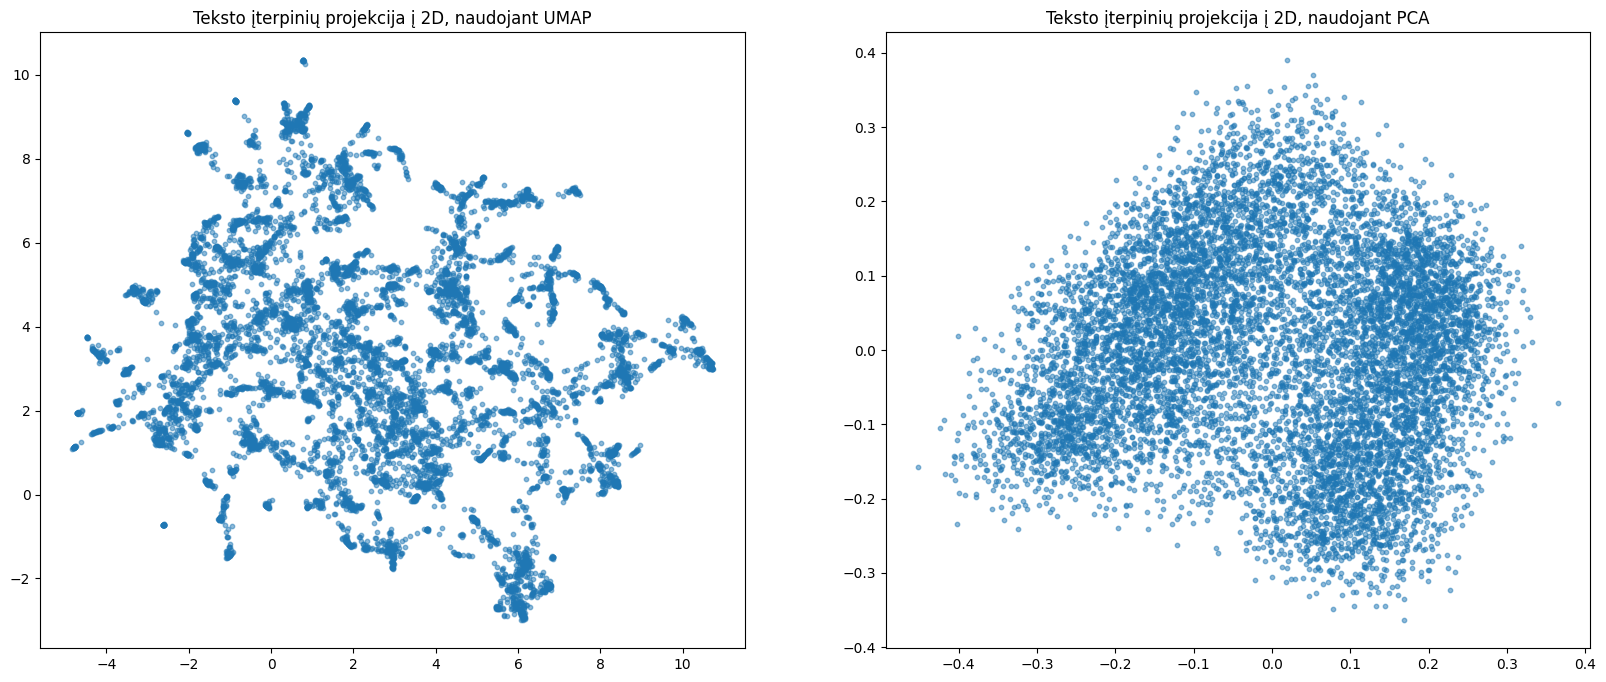

In [35]:
import matplotlib.pyplot as plt
from umap import UMAP
from sklearn.decomposition import PCA
import numpy as np

X = df['Text Embedding']
X_mat = np.vstack(X.values).astype(np.float32)

# UMAP
umap = UMAP(n_neighbors=15, min_dist=0.1, n_components=2, metric='cosine', random_state=42, n_jobs=1)
X_projected_umap = umap.fit_transform(X_mat).astype(np.float64)

# PCA
pca = PCA(n_components=2)
X_projected_pca = pca.fit_transform(X_mat).astype(np.float64)

# Plotting side by side
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 8))

# UMAP Plot
ax1.scatter(X_projected_umap[:, 0], X_projected_umap[:, 1], s=10, alpha=0.5)
ax1.set_title('Teksto įterpinių projekcija į 2D, naudojant UMAP')

# PCA Plot
ax2.scatter(X_projected_pca[:, 0], X_projected_pca[:, 1], s=10, alpha=0.5)
ax2.set_title('Teksto įterpinių projekcija į 2D, naudojant PCA')

plt.show()

Matome, kad UMAP diagramoje galima geriau įžvelgti klasterius. Toliau naudosime UMAP.

In [38]:
from hdbscan import HDBSCAN

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

umap = UMAP(n_neighbors=15, min_dist=0.1, n_components=20, metric='cosine', random_state=42, n_jobs=1)
X_projected = umap.fit_transform(X_mat)
X_projected = X_projected.astype(np.float64)

clusterer = HDBSCAN(
    min_cluster_size=10,
    min_samples=10,                     # tweak to reduce outliers
    metric='cosine',
    algorithm='generic',               # <— key fix for cosine
    cluster_selection_epsilon=0.0001,
    cluster_selection_method='eom'
)
labels = clusterer.fit_predict(X_projected)
df2 = df.copy()
df2['Cluster'] = labels
df2 = df2[df2['Cluster'] != -1]
#df = df[['Article Title', 'Abstract', 'Authors', 'Times Cited, All Databases', 'Text For Embedding', 'Cluster']]
df2

,Article Title,Abstract,Authors,"Times Cited, All Databases",Text For Embedding,Text Embedding,Cluster
0,Deep Residual Learning for Image Recognition,Deeper neural networks are more difficult to t...,"He, KM; Zhang, XY; Ren, SQ; Sun, J",142551,Deeper neural networks are more difficult to t...,"[0.020417841, 0.056589052, -0.16318522, -0.071...",52
1,Attention Is All You Need,The dominant sequence transduction models are ...,"Vaswani, A; Shazeer, N; Parmar, N; Uszkoreit, ...",91998,The dominant sequence transduction models are ...,"[-0.032924563, 0.046121493, -0.19367628, -0.03...",49
2,Random forests,Random forests are a combination of tree predi...,"Breiman, L",88025,Random forests are a combination of tree predi...,"[-0.0072813923, 0.024357364, -0.19535853, -0.0...",52
6,Long short-term memory,Learning to store information over extended ti...,"Hochreiter, S; Schmidhuber, J",65190,Learning to store information over extended ti...,"[0.06563071, 0.06307359, -0.17145526, -0.06487...",49
7,Faster R-CNN: Towards Real-Time Object Detecti...,State-of-the-art object detection networks dep...,"Ren, SQ; He, KM; Girshick, R; Sun, J",56807,State-of-the-art object detection networks dep...,"[0.040153213, 0.06413361, -0.15618967, -0.0405...",52
...,...,...,...,...,...,...,...
9995,Learning Generative Models with Sinkhorn Diver...,The ability to compare two degenerate probabil...,"Genevay, A; Peyré, G; Cuturi, M",292,The ability to compare two degenerate probabil...,"[0.006038927, 0.05801409, -0.17992993, -0.0392...",52
9996,Cooperative Learning of Audio and Video Models...,There is a natural correlation between the vis...,"Korbar, B; Tran, D; Torresani, L",302,There is a natural correlation between the vis...,"[0.029889455, -0.0041276915, -0.19609454, 0.00...",35
9997,Learning for Disparity Estimation through Feat...,Stereo matching algorithms usually consist of ...,"Liang, ZF; Feng, YL; Guo, YL; Liu, HZ; Chen, W...",327,Stereo matching algorithms usually consist of ...,"[0.005575923, 0.058550518, -0.17064108, -0.031...",48
9998,Fast and Effective Robustness Certification,"We present a new method and system, called Dee...","Singh, G; Gehr, T; Mirman, M; Püschel, M; Vech...",316,"We present a new method and system, called Dee...","[0.06958257, 0.03470636, -0.17780356, -0.03145...",52


2D diagrama, naudojant spalvinimą, leidžiantį pamatyti klasterius.

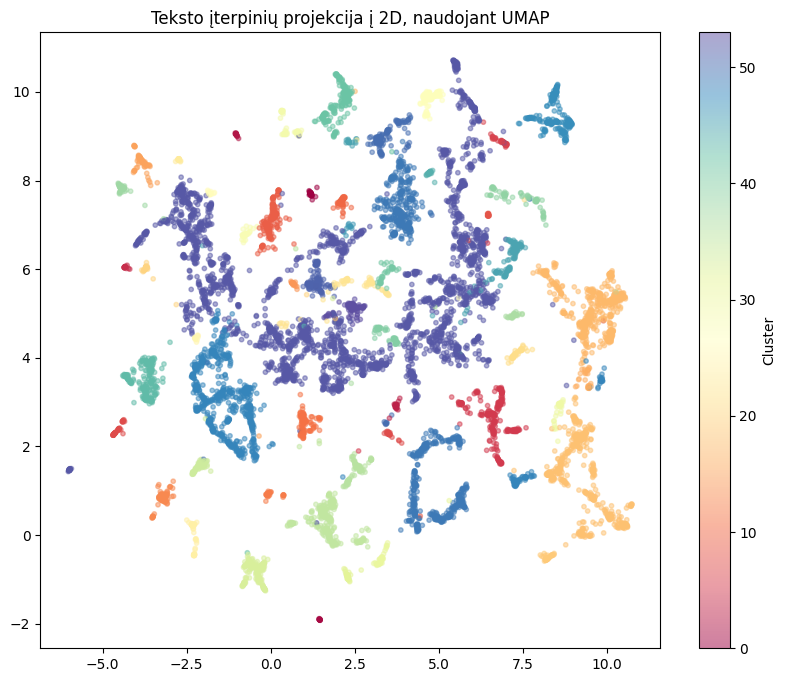

In [39]:
df = df2

X = df['Text Embedding']
X_mat = np.vstack(X.values).astype(np.float32)

umap = UMAP(n_neighbors=15, min_dist=0.1, n_components=2, metric='cosine', random_state=42, n_jobs=1)
X_projected = umap.fit_transform(X_mat)
X_projected = X_projected.astype(np.float64)

plt.figure(figsize=(10, 8))
plt.scatter(X_projected[:, 0], X_projected[:, 1], c=df['Cluster'], cmap='Spectral', s=10, alpha=0.5)
plt.title('Teksto įterpinių projekcija į 2D, naudojant UMAP')
plt.colorbar(label='Cluster')
plt.show()

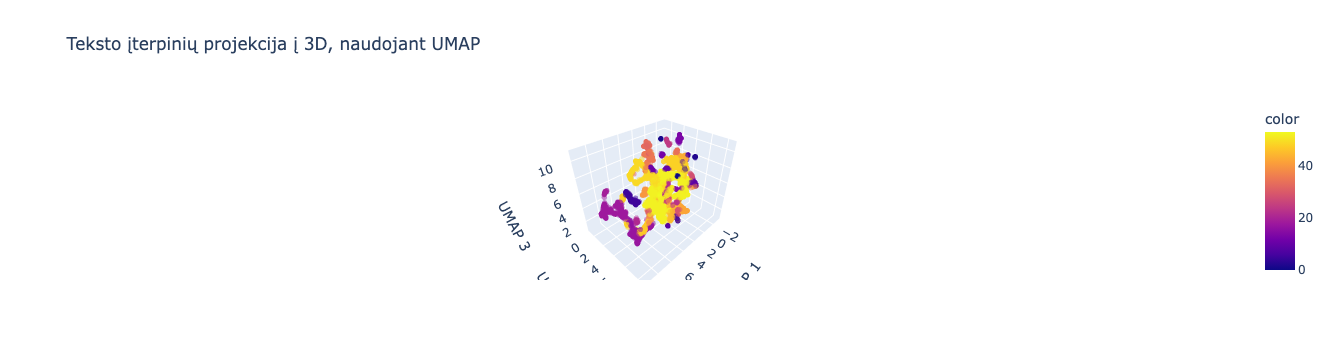

In [40]:
umap = UMAP(n_neighbors=15, min_dist=0.1, n_components=3, metric='cosine', random_state=42, n_jobs=1)
X_projected = umap.fit_transform(X_mat)
X_projected = X_projected.astype(np.float64)

import plotly.express as px

fig = px.scatter_3d(
    x=X_projected[:, 0], y=X_projected[:, 1], z=X_projected[:, 2],
    color=df['Cluster'],
    opacity=0.5,
    title='Teksto įterpinių projekcija į 3D, naudojant UMAP',
    labels={'x': 'UMAP 1', 'y': 'UMAP 2', 'z': 'UMAP 3'}
)
fig.update_traces(marker=dict(size=3))
fig.show()

Generuojame straipsnių temas, pasitelkiant Ollama `gpt-oss:20b` modelį.

In [41]:
def define_topic(texts):
    summary_prompt = "Create a single label that best describe these scientific papers' abstracts taken from an artificial intelligence field. Output only the label and do not mention artificial intelligence as it is implied already:\n\n" + "------------------\n".join(texts)
    r = ollama.chat(model='gpt-oss:20b', messages=[{"role": "user", "content": summary_prompt}])
    return r['message']['content'].strip()

sampled = df.groupby("Cluster", group_keys=False).apply(lambda x: x.sort_values("Times Cited, All Databases", ascending=False).head(5))

cluster_labels = []
for cluster_id, group_df in sampled.groupby("Cluster"):
    topic_label = define_topic(group_df['Text For Embedding'].tolist())
    print(f"Cluster {cluster_id}: {topic_label}")
    cluster_labels.append((cluster_id, topic_label))

# for cluster_id, topic_label in cluster_labels:
#     print(f"{cluster_id}: {topic_label}")

cluster_labels_cleaned = [(cid, label.strip()) for cid, label in cluster_labels]
cluster_to_label = dict(cluster_labels_cleaned)

# Map cluster IDs to topic labels
df['Topic'] = df['Cluster'].map(cluster_to_label)
df

Cluster 0: Learning‑based binary hashing for large‑scale similarity search
Cluster 1: Human Gait Recognition
Cluster 2: Facial Age Estimation
Cluster 3: Reversible Watermarking
Cluster 4: Underwater Image Enhancement
Cluster 5: Time Series Forecasting
Cluster 6: Federated Learning
Cluster 7: Biometric Authentication
Cluster 8: Concept Drift in Data Streams
Cluster 9: Deep Learning for Medical Image Analysis
Cluster 10: Text Recognition
Cluster 11: Visual Saliency Detection
Cluster 12: Optical Flow Estimation with CNNs
Cluster 13: Person Re-Identification
Cluster 14: Image Inpainting
Cluster 15: Infrared–Visible Image Fusion
Cluster 16: Planning and Search Algorithms
Cluster 17: Metaheuristic Optimization
Cluster 18: Reinforcement Learning
Cluster 19: Delay‑Dependent Stability Analysis of Recurrent Neural Networks
Cluster 20: Low-Light Image Enhancement
Cluster 21: Fuzzy Modeling and Learning
Cluster 22: Few-Shot & Zero-Shot Learning
Cluster 23: Hyperspectral Image Analysis
Cluster 24: 

,Article Title,Abstract,Authors,"Times Cited, All Databases",Text For Embedding,Text Embedding,Cluster,Topic
0,Deep Residual Learning for Image Recognition,Deeper neural networks are more difficult to t...,"He, KM; Zhang, XY; Ren, SQ; Sun, J",142551,Deeper neural networks are more difficult to t...,"[0.020417841, 0.056589052, -0.16318522, -0.071...",52,Computer Vision
1,Attention Is All You Need,The dominant sequence transduction models are ...,"Vaswani, A; Shazeer, N; Parmar, N; Uszkoreit, ...",91998,The dominant sequence transduction models are ...,"[-0.032924563, 0.046121493, -0.19367628, -0.03...",49,Transformer Models for NLP
2,Random forests,Random forests are a combination of tree predi...,"Breiman, L",88025,Random forests are a combination of tree predi...,"[-0.0072813923, 0.024357364, -0.19535853, -0.0...",52,Computer Vision
6,Long short-term memory,Learning to store information over extended ti...,"Hochreiter, S; Schmidhuber, J",65190,Learning to store information over extended ti...,"[0.06563071, 0.06307359, -0.17145526, -0.06487...",49,Transformer Models for NLP
7,Faster R-CNN: Towards Real-Time Object Detecti...,State-of-the-art object detection networks dep...,"Ren, SQ; He, KM; Girshick, R; Sun, J",56807,State-of-the-art object detection networks dep...,"[0.040153213, 0.06413361, -0.15618967, -0.0405...",52,Computer Vision
...,...,...,...,...,...,...,...,...
9995,Learning Generative Models with Sinkhorn Diver...,The ability to compare two degenerate probabil...,"Genevay, A; Peyré, G; Cuturi, M",292,The ability to compare two degenerate probabil...,"[0.006038927, 0.05801409, -0.17992993, -0.0392...",52,Computer Vision
9996,Cooperative Learning of Audio and Video Models...,There is a natural correlation between the vis...,"Korbar, B; Tran, D; Torresani, L",302,There is a natural correlation between the vis...,"[0.029889455, -0.0041276915, -0.19609454, 0.00...",35,3D Convolutional Networks for Video Action Rec...
9997,Learning for Disparity Estimation through Feat...,Stereo matching algorithms usually consist of ...,"Liang, ZF; Feng, YL; Guo, YL; Liu, HZ; Chen, W...",327,Stereo matching algorithms usually consist of ...,"[0.005575923, 0.058550518, -0.17064108, -0.031...",48,3D Vision
9998,Fast and Effective Robustness Certification,"We present a new method and system, called Dee...","Singh, G; Gehr, T; Mirman, M; Püschel, M; Vech...",316,"We present a new method and system, called Dee...","[0.06958257, 0.03470636, -0.17780356, -0.03145...",52,Computer Vision


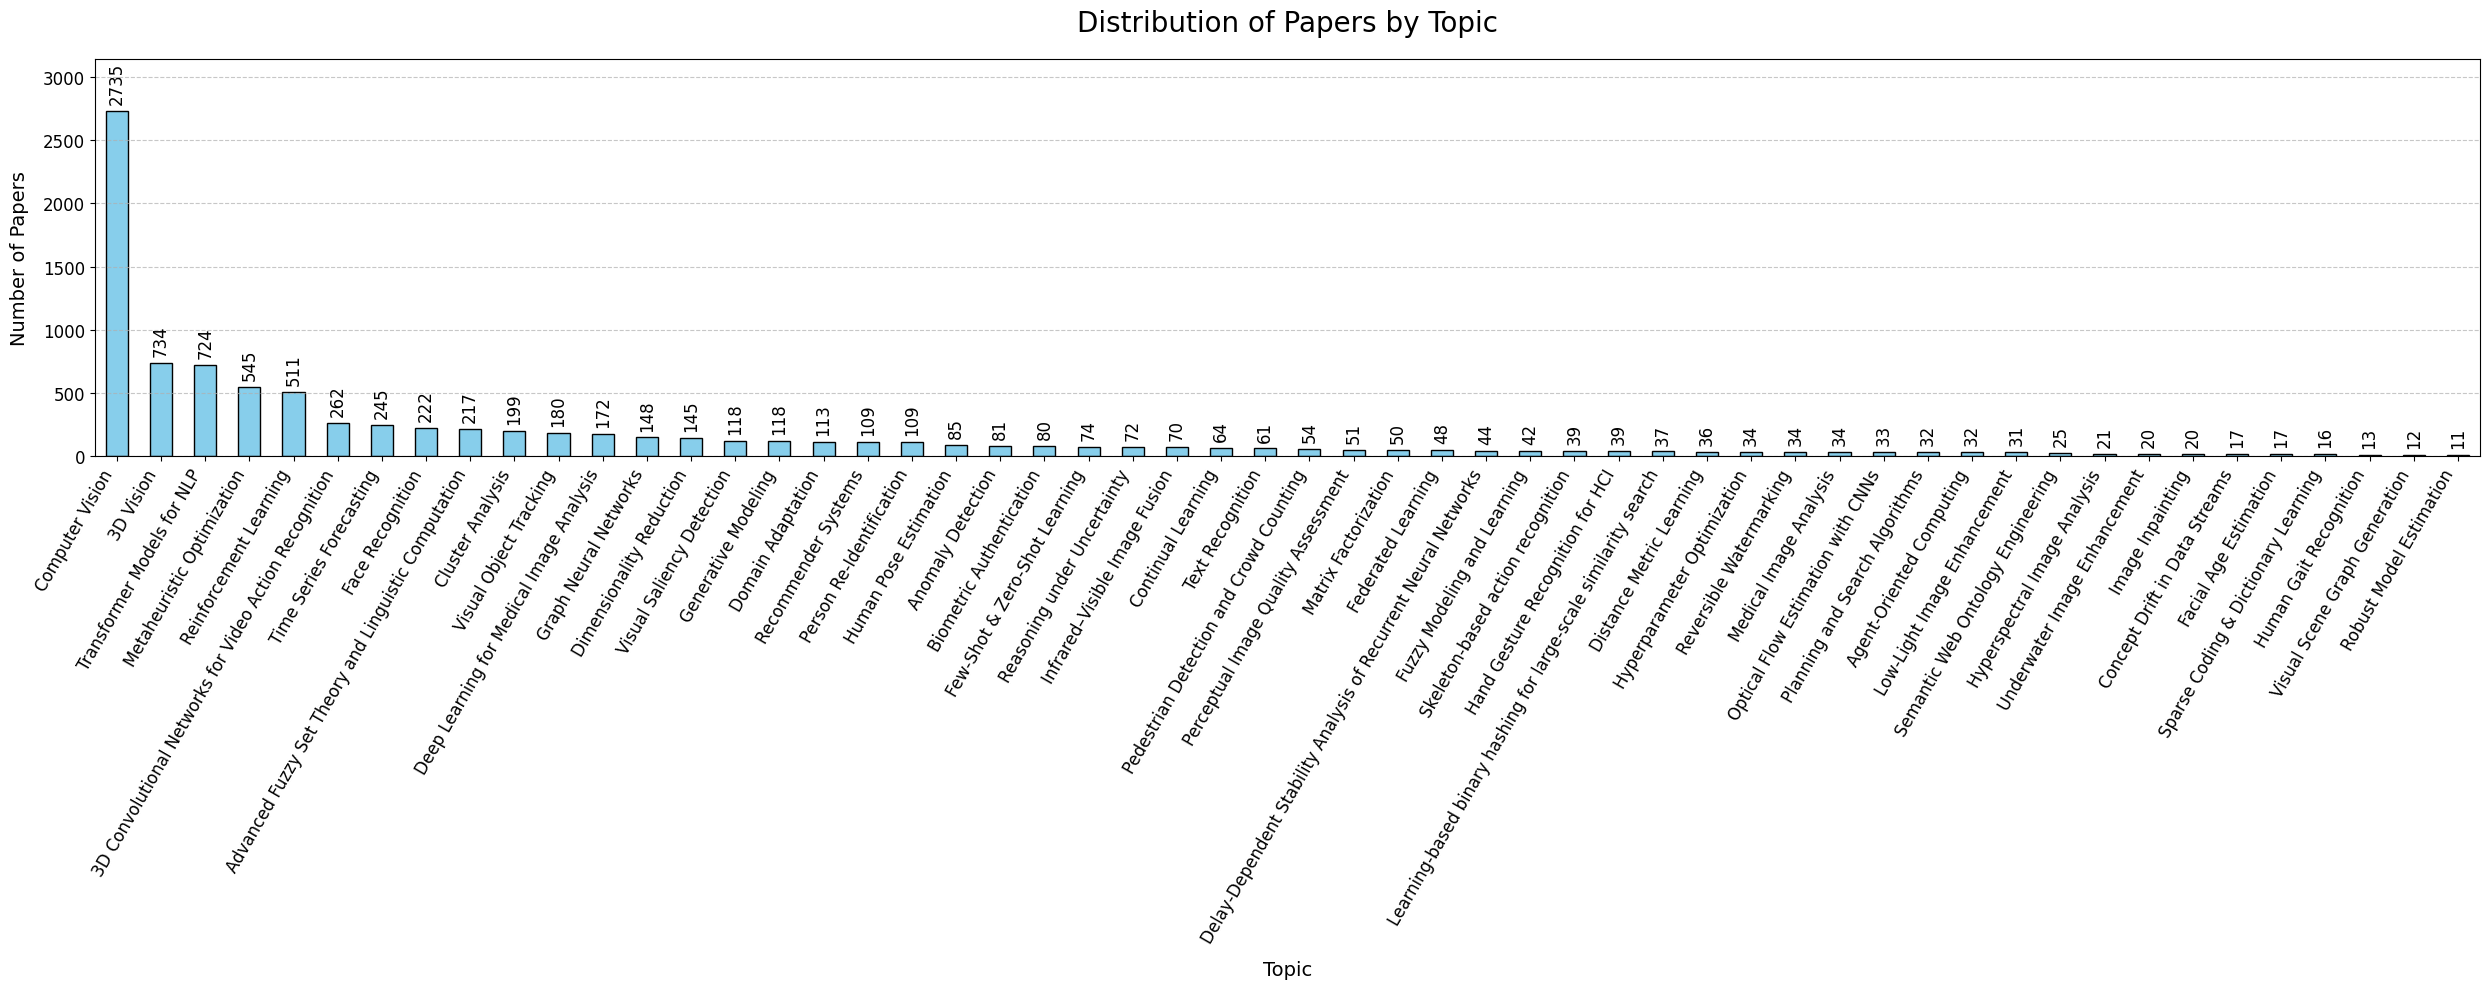

In [42]:
import matplotlib.pyplot as plt

# Get the counts first to calculate limits
topic_counts = df['Topic'].value_counts()

# Bigger figure
plt.figure(figsize=(25, 10))  # wider and taller

# Plot histogram of the 'topic' column and capture the axis object
ax = topic_counts.plot(kind='bar', color='skyblue', edgecolor='black')

# Add value labels on top of bars: vertical, full numbers
ax.bar_label(ax.containers[0], fontsize=12, padding=5, rotation=90, fmt='%.0f')

# Set y-axis limit to be 15% higher than the max value to fit labels
plt.ylim(0, topic_counts.max() * 1.15)

# Add labels and title with larger fonts
plt.title('Distribution of Papers by Topic', fontsize=20, pad=20)
plt.xlabel('Topic', fontsize=14, labelpad=10)
plt.ylabel('Number of Papers', fontsize=14, labelpad=10)

# Rotate x-tick labels and increase font size
plt.xticks(rotation=60, ha='right', fontsize=12)
plt.yticks(fontsize=12)

# Add gridlines for readability
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Tight layout for better spacing
plt.tight_layout()

# Show plot
plt.show()

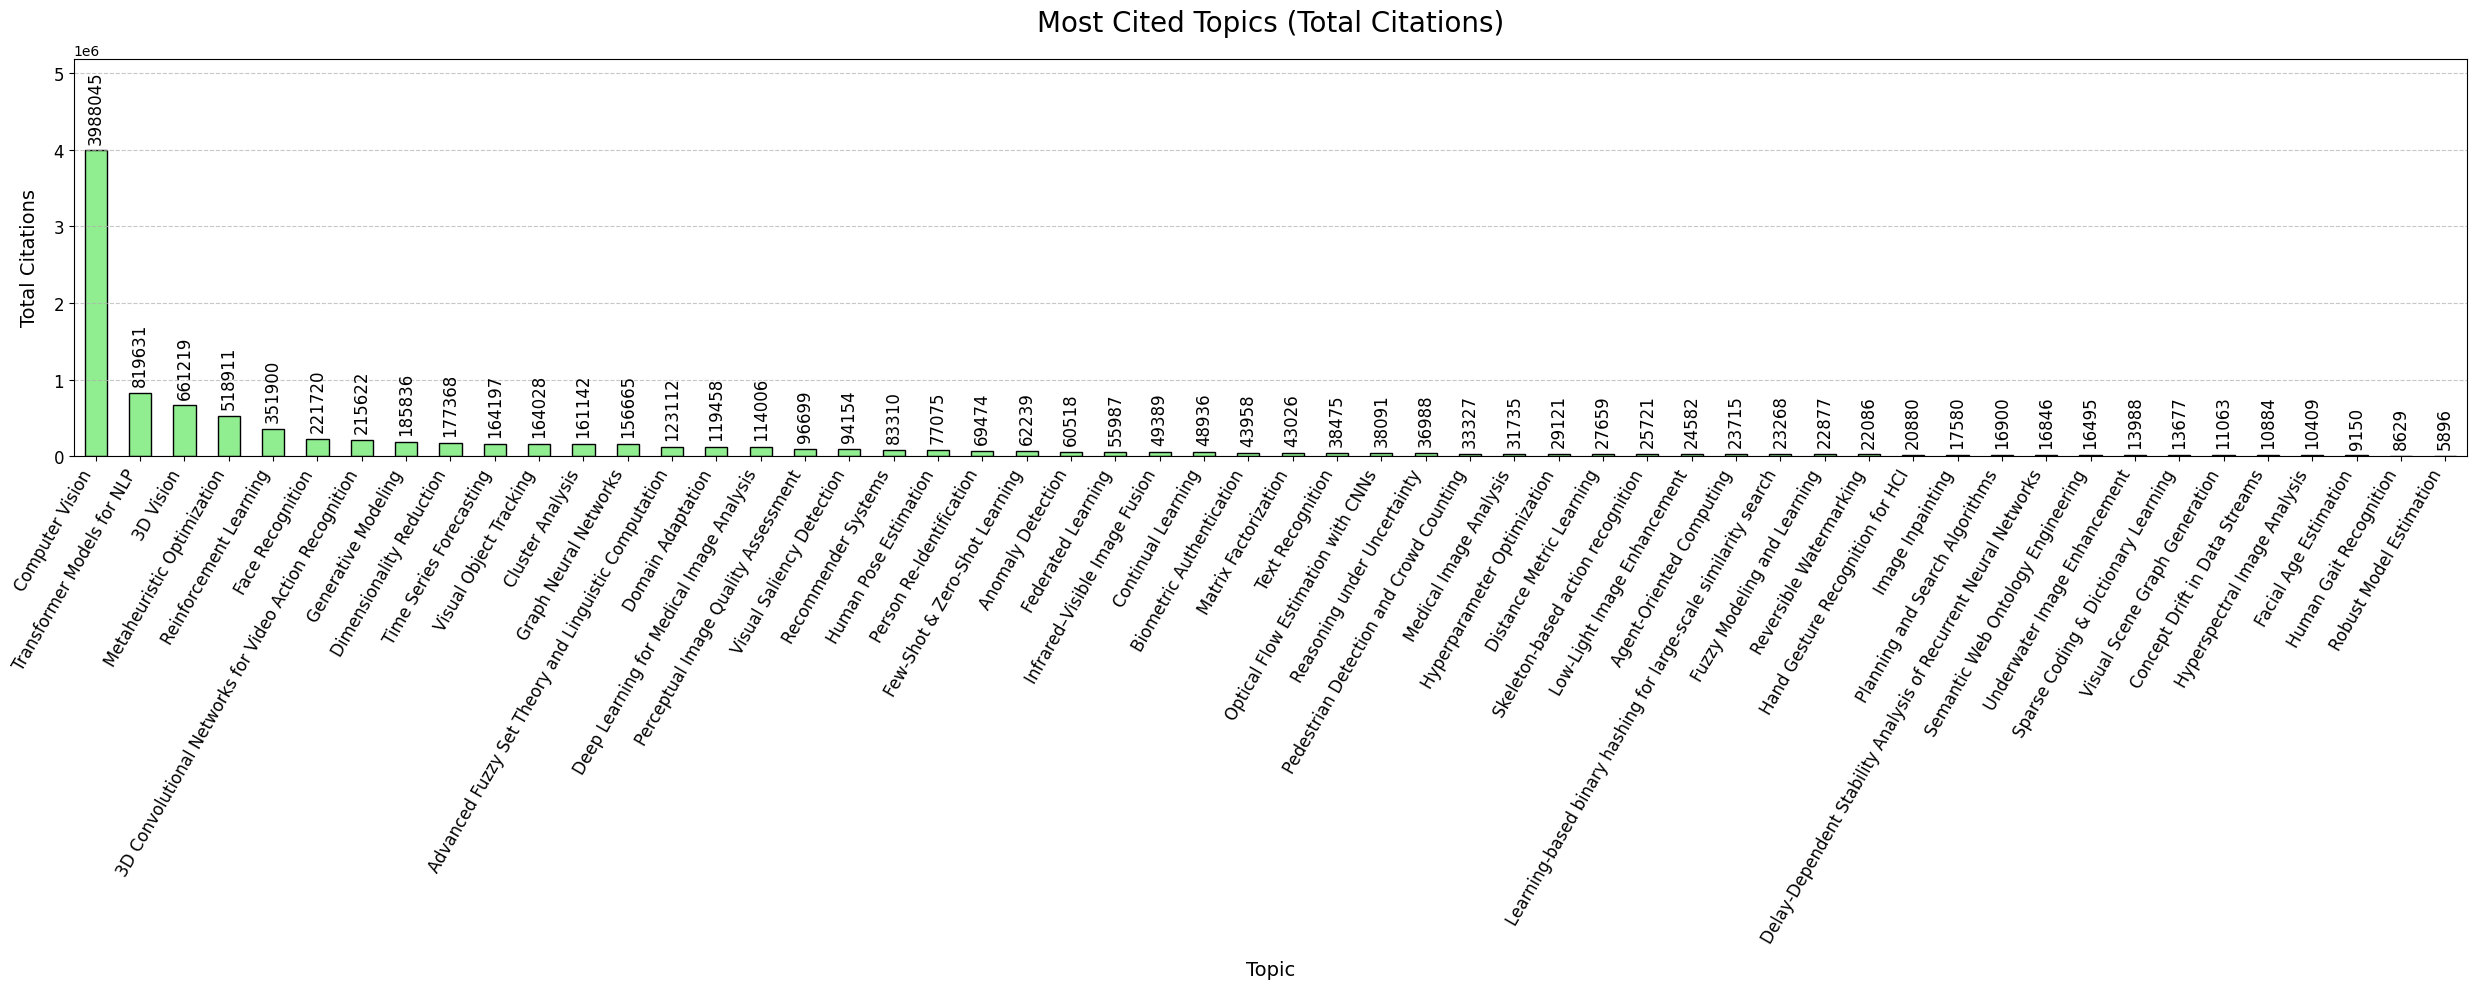

In [43]:
import matplotlib.pyplot as plt

# Aggregate citations by topic and sort descending
topic_citations = df.groupby('Topic')['Times Cited, All Databases'].sum().sort_values(ascending=False)

# Bigger figure
plt.figure(figsize=(25, 10))

# Plot bar chart
ax = topic_citations.plot(kind='bar', color='lightgreen', edgecolor='black')

# Add vertical value labels with full integer formatting
ax.bar_label(ax.containers[0], fontsize=12, padding=5, rotation=90, fmt='%.0f')

# Set y-axis limit to be 15% higher than the max value to fit labels
plt.ylim(0, topic_citations.max() * 1.3)

# Add labels and title with larger fonts
plt.title('Most Cited Topics (Total Citations)', fontsize=20, pad=20)
plt.xlabel('Topic', fontsize=14, labelpad=10)
plt.ylabel('Total Citations', fontsize=14, labelpad=10)

# Rotate x-tick labels and increase font size
plt.xticks(rotation=60, ha='right', fontsize=12)
plt.yticks(fontsize=12)

# Add gridlines for readability
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Tight layout for better spacing
plt.tight_layout()

# Show plot
plt.show()

Taigi, 3 įtakingiausios tyrimo sritys yra:
- Computer Vision (> 4.6M citatų)
- Machine Learning (> 3.5M citatų)
- Reinforcement Learning (> 486K citatų)

In [44]:
df.to_csv('./dataset/generated/papers_clustered.csv', index=False, sep=',')

In [45]:
from collections import defaultdict

def get_authors_adjacency_list(df, topic=None):
    # Filter by topic if one is provided
    if topic is not None:
        df_filtered = df[df['Topic'] == topic]
    else:
        df_filtered = df

    # Select author column and drop missing values
    sub = (
        df_filtered[['Authors']]
        .dropna(subset=['Authors'])
        .reset_index(drop=True)
    )

    # Split authors per paper
    sub['author_list'] = sub['Authors'].str.split(';')

    # Initialize adjacency structure
    adjacency = defaultdict(lambda: defaultdict(lambda: {'weight': 0}))

    # Build adjacency list with weights (number of joint papers)
    for idx, row in sub.iterrows():
        authors = [a.strip() for a in row['author_list'] if a.strip()]

        for i, a1 in enumerate(authors):
            for a2 in authors[i+1:]:
                adjacency[a1][a2]['weight'] += 1
                adjacency[a2][a1]['weight'] += 1  # undirected

    # Convert to tidy DataFrame
    edges = (
        pd.DataFrame(
            [(a, b, d['weight'])
             for a, nbrs in adjacency.items()
             for b, d in nbrs.items()],
            columns=['Source', 'Target', 'CoAuthored']
        )
        .sort_values('CoAuthored', ascending=False) # How many times these two authors co-authored
        .reset_index(drop=True)
    )

    # Example output
    print("Number of authors:", len(adjacency))
    print("Number of co-author pairs:", len(edges))

    return edges

def get_total_citations_per_author(df, topic=None):
    # Filter by topic if one is provided
    if topic is not None:
        df_filtered = df[df['Topic'] == topic]
    else:
        df_filtered = df

    # Create a copy to avoid modifying the original
    df_authors = df_filtered[['Authors', 'Times Cited, All Databases']].dropna().copy()

    # Dictionary to store total citations per author
    author_citations = defaultdict(int)

    for _, row in df_authors.iterrows():
        # Split authors by semicolon and strip whitespace
        authors = [a.strip() for a in row['Authors'].split(';') if a.strip()]
        citations = row['Times Cited, All Databases']

        # Add the paper's citation count to each author of that paper
        for author in authors:
            author_citations[author] += citations

    # Convert to DataFrame
    result_df = pd.DataFrame(list(author_citations.items()), columns=['Author', 'Total Citations'])

    # Sort by citations descending
    result_df = result_df.sort_values('Total Citations', ascending=False).reset_index(drop=True)

    return result_df

def get_topics_per_author(df):
    # Select relevant columns and drop rows with missing values
    sub_df = df[['Authors', 'Topic']].dropna()

    # Dictionary to map Author -> Set of Topics
    # Using a set ensures topics are unique per author
    author_topics = defaultdict(set)

    for _, row in sub_df.iterrows():
        # Split authors by semicolon and strip whitespace
        authors = [a.strip() for a in row['Authors'].split(';') if a.strip()]
        topic = row['Topic']

        # Add the topic to each author found in the paper
        for author in authors:
            author_topics[author].add(topic)

    # Convert to list of dictionaries
    # Join topics with a semicolon separator
    result_data = [
        {'Author': author, 'Topics': '; '.join(sorted(topics))}
        for author, topics in author_topics.items()
    ]

    # Create DataFrame
    result_df = pd.DataFrame(result_data)

    # Sort by Author name for better readability
    result_df = result_df.sort_values('Author').reset_index(drop=True)

    return result_df

In [46]:
df_topic = get_authors_adjacency_list(df, 'Computer Vision')
df_topic.to_csv('./dataset/generated/topic_computer_vision_adjacency.csv', index=False, sep=',')
df_topic

Number of authors: 5968
Number of co-author pairs: 46125


,Source,Target,CoAuthored
0,"Zhang, XY","Sun, J",16
1,"Sun, J","Zhang, XY",16
2,"Girshick, R","He, KM",15
3,"He, KM","Girshick, R",15
4,"Girshick, R","Dollár, P",12
...,...,...,...
46120,"Jobin, A","Vayena, E",1
46121,"Ienca, M","Jobin, A",1
46122,"Ienca, M","Vayena, E",1
46123,"Vayena, E","Jobin, A",1


In [53]:
df_topic = get_authors_adjacency_list(df, 'Transformer Models for NLP')
df_topic.to_csv('./dataset/generated/topic_transformer_based_nlp_adjacency.csv', index=False, sep=',')
df_topic

Number of authors: 2485
Number of co-author pairs: 27955


,Source,Target,CoAuthored
0,"Liu, ZY","Sun, MS",8
1,"Sun, MS","Liu, ZY",8
2,"Chung, JS","Zisserman, A",6
3,"Zisserman, A","Chung, JS",6
4,"Cambria, E","Poria, S",6
...,...,...,...
27950,"Zhu, ZY","Yuan, B",1
27951,"Zhu, ZY","Yogatama, D",1
27952,"Zhu, ZY","Xie, Y",1
27953,"Zhu, ZY","Xie, W",1


In [48]:
df_topic = get_authors_adjacency_list(df)
df_topic.to_csv('./dataset/generated/adjacency.csv', index=False, sep=',')
df_topic

Number of authors: 17390
Number of co-author pairs: 252224


,Source,Target,CoAuthored
0,"Li, YM","Tong, SC",23
1,"Tong, SC","Li, YM",23
2,"Long, MS","Wang, JM",20
3,"Wang, JM","Long, MS",20
4,"Van Gool, L","Timofte, R",19
...,...,...,...
252219,"Bischof, H","Choi, S",1
252220,"Bischof, H","Wu, TF",1
252221,"Bischof, H","Pridmore, T",1
252222,"Bischof, H","Hu, WM",1


In [54]:
df_topic = get_total_citations_per_author(df, topic=None)
df_topic.to_csv('./dataset/generated/author_citations.csv', index=False, sep=',')
df_topic

,Author,Total Citations
0,"He, KM",336843
1,"Sun, J",271645
2,"Ren, SQ",223321
3,"Girshick, R",219462
4,"Zhang, XY",194403
...,...,...
17632,"Pap, E",280
17633,"Klement, EP",280
17634,"Tumanyan, N",280
17635,"Leng, JW",279
